Re- create and validate the MLR model yourself, 
using the steps outlined in this document

Use the statsmodels based OLS function to repeat 
all these steps, and analyze the additional metrics 
created (Omnibus, Durbin- Watson, Jarque- Bera, 
AIC, BIC, Condition Number, etc.) at each stage

1.2.
Note: In the data file 'data- set- for- MLR.xlsx' the train 
and test data have been given on two different sheets

In [2]:
import pandas as pd



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.07
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           2.67e-29
Time:                        15:35:17   Log-Likelihood:                -116.79
No. Observations:                  85   AIC:                             245.6
Df Residuals:                      79   BIC:                             260.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9080      0.597     11.573      0.0

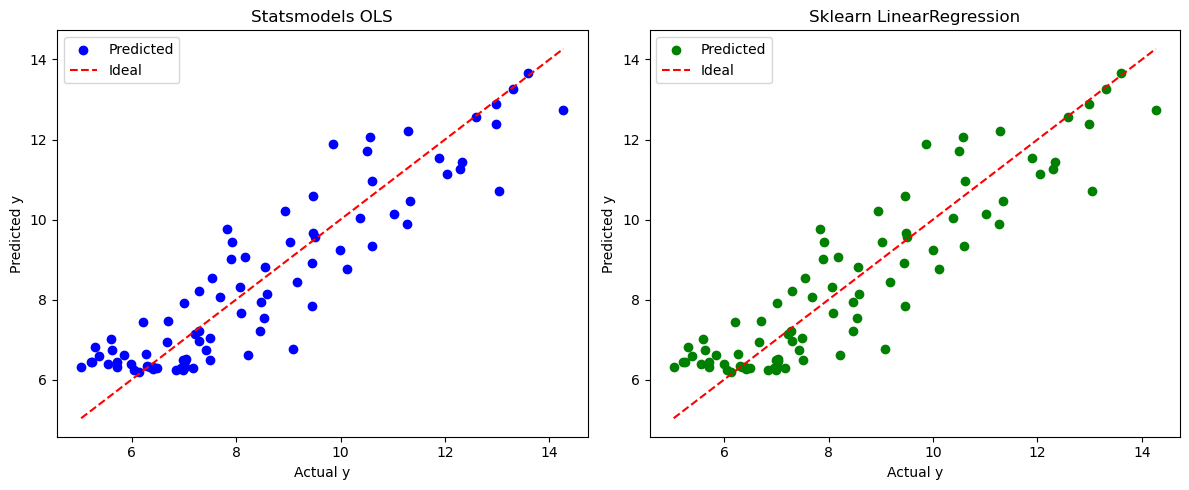

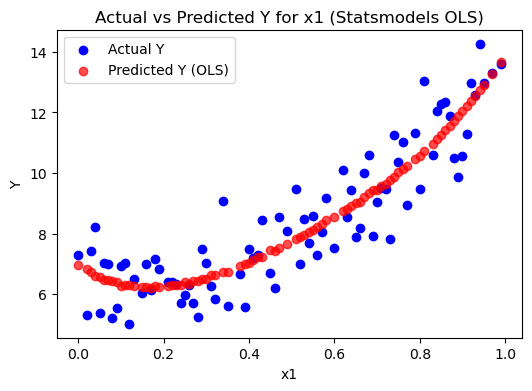

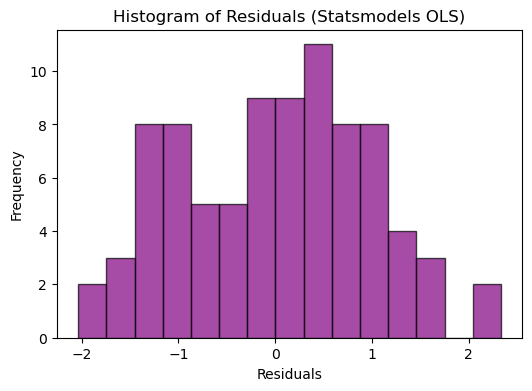

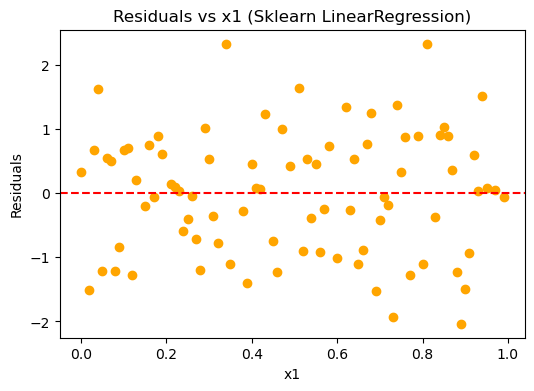

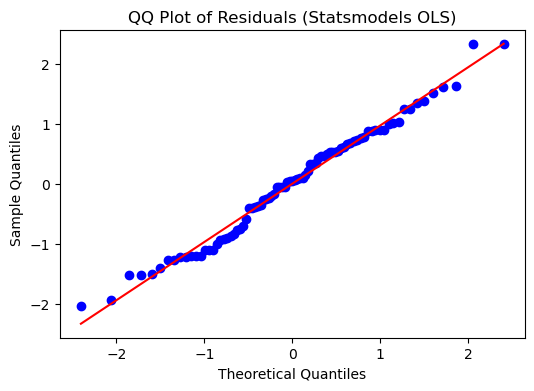

C:\Users\pravi\AppData\Local\Temp\ipykernel_6564\228833279.py:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


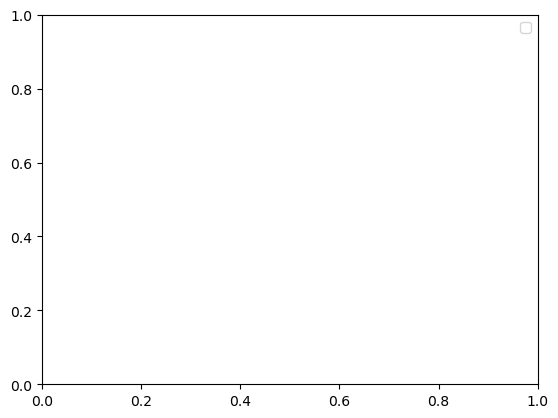

In [20]:

from xlwings import sheets
from sklearn.linear_model import LinearRegression
import numpy as np

path="../data/data-set-for-MLR.xlsx"
df_train = pd.read_excel(path, sheet_name=sheet_names[0])
df_test = pd.read_excel(path, sheet_name=sheet_names[1])

df_train.head()
df_test.head()

import statsmodels.api as sm

X = df_train[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df_train['y']
X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Prepare train data for sklearn (exclude 'const' column)
X_sklearn = X.drop(columns=['const'])
y_sklearn = y

# Fit sklearn LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_sklearn, y_sklearn)

# Print statsmodels summary (already printed above)
print("\nStatsmodels OLS Summary:")
print(ols_model.summary())

# Print sklearn summary
print("\nSklearn LinearRegression Summary:")
print(f"Intercept: {sk_model.intercept_}")
print(f"Coefficients: {sk_model.coef_}")
print(f"R^2 Score: {sk_model.score(X_sklearn, y_sklearn)}")

# Compare models
print("\nComparison:")
print(f"Statsmodels R^2: {ols_model.rsquared}")
print(f"Sklearn R^2: {sk_model.score(X_sklearn, y_sklearn)}")

import matplotlib.pyplot as plt

# Predict on train data
y_pred_ols = ols_model.predict(X)
y_pred_sk = sk_model.predict(X_sklearn)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# OLS model plot
axs[0].scatter(y, y_pred_ols, color='blue', label='Predicted')
axs[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
axs[0].set_title('Statsmodels OLS')
axs[0].set_xlabel('Actual y')
axs[0].set_ylabel('Predicted y')
axs[0].legend()

# Sklearn model plot
axs[1].scatter(y, y_pred_sk, color='green', label='Predicted')
axs[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
axs[1].set_title('Sklearn LinearRegression')
axs[1].set_xlabel('Actual y')
axs[1].set_ylabel('Predicted y')
axs[1].legend()

plt.tight_layout()
plt.show()


# Actual vs Predicted plot for Y vs x1 (Statsmodels OLS)
plt.figure(figsize=(6, 4))
plt.scatter(df_train['x1'], y, color='blue', label='Actual Y')
plt.scatter(df_train['x1'], y_pred_ols, color='red', label='Predicted Y (OLS)', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('Y')
plt.title('Actual vs Predicted Y for x1 (Statsmodels OLS)')
plt.legend()
plt.show()

# Histogram of residuals (Statsmodels OLS)
residuals_ols = y - y_pred_ols
plt.figure(figsize=(6, 4))
plt.hist(residuals_ols, bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Statsmodels OLS)')
plt.show()
# Residuals vs x1 plot using Sklearn LinearRegression
residuals_sk = y_sklearn - y_pred_sk
plt.figure(figsize=(6, 4))
plt.scatter(df_train['x1'], residuals_sk, color='orange', label='Residuals (Sklearn)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x1')
plt.ylabel('Residuals')
plt.title('Residuals vs x1 (Sklearn LinearRegression)')

# QQ plot for residuals (Statsmodels OLS)
import scipy.stats as stats
plt.figure(figsize=(6, 4))
stats.probplot(residuals_ols, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals (Statsmodels OLS)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
plt.legend()
plt.show()

